# 《合成孔径雷达成像——算法与实现》中2.6 平滑窗

##  不同alpha值下的Hanning窗



In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体 
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题 

In [2]:
def hanning(N,alpha):
    T = 1
    dt = 1/N;
    t  = np.arange(0,T,dt)
    return alpha-(1-alpha)*np.cos(2*np.pi*t)

这里构造计算3dB宽度的函数，首先得到a中的最大值的位置，然后计算左侧最接近3dB宽度的位置，再计算右侧最接近3dB宽度的位置，右侧位置需要加上最大值位置减1才可以得到相对整个矩阵的位置。最后右侧位置减左侧位置即为3dB宽度。
这里输入的a矩阵需要是归一化后的用dB来表示的值。

In [3]:

def width_of(a):
    maxIndex = np.argmax(a)
    t_r_index = np.argmin(np.abs(a[maxIndex:]+3));
    t_l_index = np.argmin(np.abs(a[:maxIndex]+3));
    t_r_index = t_r_index + maxIndex - 1;
    t = t_r_index - t_l_index;
    return t,t_r_index,t_l_index


构造计算峰值旁瓣比的函数。先找出所有的峰值点，然后降序排序，选出第二个值，这里因为已经归一化，所以不需要除去主瓣最大值，因为主瓣最大值即为1。

In [4]:
from scipy.signal import find_peaks
def getpslr(a):
    peaks = find_peaks(a)
#     print( a )
#     print( a[peaks[0]] )
    sort_array = np.sort(a[peaks[0]])[::-1]
#     print( sort_array )
    k = sort_array[1]
    return k

d:\anaconda3\envs\stock\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
d:\anaconda3\envs\stock\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10
d:\anaconda3\envs\stock\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
d:\anaconda3\envs\stock\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10
d:\anaconda3\envs\stock\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
d:\anaconda3\envs\stock\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10
d:\anaconda3\envs\stock\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
d:\anaconda3\envs\stock\lib\site-packages\ipyker

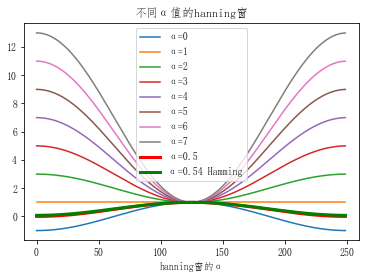

In [8]:
fig = plt.figure();
N = 250;
legends = [];
pslr = [];
wide_3dB = [];
rg = 8
for i in range(rg):
    #idx=num2str(i);
    #figure(A);hold on;
    z = hanning(N,i);
#    plt.plot(z,'LineWidth',1);
    plt.plot(z);
    plt.xlim((-10,260));
    can = np.fft.fft( z, 100*N ); 
    can = np.abs(can);
    can = 20*np.log10( can/np.max(can) );
    can = np.fft.fftshift( can );
    legends.append('α='+str(i))
    
    pslr.append( getpslr(can) )
    
    can1 = np.fft.fft( z, 100*N );
    can1 = np.abs((can1)**2);
    can1 = 20*np.log10( can1/np.max(can1) );
    can1 = np.fft.fftshift( can1 );
    
    t,t_r_location,t_l_location = width_of(can1);
    wide_3dB.append(t) 


plt.plot(hanning(N,0.5),color='red',linewidth=3);
plt.xlim((-10,260));
legends.append('α=0.5')
plt.plot(hanning(N,0.54),color='green',linewidth=3);
plt.xlim((-10,260));
legends.append('α=0.54 Hamming')
plt.xlabel('Hanning窗的α'); plt.title('不同α值的Hanning窗');
plt.legend( legends )

## 不同Hanning窗的展宽和峰值旁瓣比

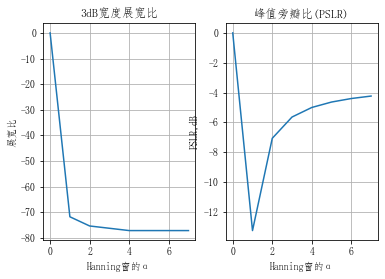

In [10]:
#% 画3dB宽度展宽比
q =  wide_3dB/wide_3dB[0]-1;
plt.subplot(1,2,1);
plt.plot( np.arange(rg),100*q);
plt.xlabel('Hanning窗的α'); plt.ylabel('展宽比'); plt.title('3dB宽度展宽比')
plt.grid()

#% 画峰值旁瓣比

plt.subplot(1,2,2);
plt.plot( np.arange(rg), pslr );
plt.xlabel('Hanning窗的α'); plt.ylabel('PSLR,dB'); plt.title('峰值旁瓣比(PSLR)')
plt.grid()

本文Python代码参照Matlab代码自 https://blog.csdn.net/a619398297/article/details/112598604